In [38]:
%matplotlib notebook

import os
import re
import fnmatch
import numpy as np

from sklearn.model_selection import train_test_split
import scipy.io.wavfile

import matplotlib.pyplot as plt

In [2]:
# Define constants
DATA_ROOT = 'data'
TRAIN_TEST_SPLIT_PCT = 0.3
RANDOM_STATE = 12345

In [14]:
# Get all files
root = os.path.abspath(DATA_ROOT)
data_files = os.listdir(root)

# Get unique labels; discard device info
pattern = '[0-9]+_(.*).txt'
dataset = list()
for data_file in data_files:
    if re.match(pattern, data_file):
        dataset.append({
            'label': data_file
        })
    
# Append data files to list of dict
for counter, data in enumerate(dataset):
    label = data['label'].split('.txt')[0]
    matching_data = fnmatch.filter(data_files, label + '*.wav')
    dataset[counter]['signal'] = matching_data[0]

# Perform train/test split
dataset_train, dataset_test = train_test_split(dataset, test_size=TRAIN_TEST_SPLIT_PCT, random_state=RANDOM_STATE)

# Print top of the list
dataset_train[:5]

[{'label': '258135_24_M_20_2.txt', 'signal': '258135_24_M_20_2.wav'},
 {'label': '258135_24_M_21_3.txt', 'signal': '258135_24_M_21_3.wav'}]

In [4]:
# Temporarily take a single data-label pair
data = dataset_train[0]

<IPython.core.display.Javascript object>


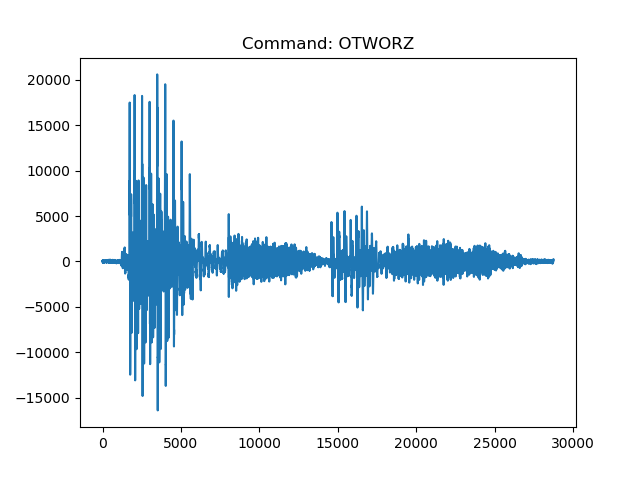

Text(0.5,1,'Command: OTWORZ')

In [44]:
# Read samples
temp_path = os.path.join(root, data['signal'])
srate, samples = scipy.io.wavfile.read(temp_path)

# Create time vector
time = np.linspace(0, (len(samples)-1)/srate, len(samples))

# Parse command labels
temp_path = os.path.join(root, data['label'])
with open(temp_path) as f:
    labels = [line.split('\t') for line in f]
    for label in labels:
        label[0] = float(label[0])
        label[1] = float(label[1])
        label[2] = label[2].split('\n')[0]

# Assign signal segments to each command
features = list()
targets = list()
for label in labels:
    targets.append(label[2])
    features.append(
        samples[(time >= label[0]) & (time <= label[1])]
    )

# Display a time series
plt.plot(features[0])
plt.title('Command: ' + targets[0])